In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = "C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/MergedCSV/processed_delay_data.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105354 entries, 0 to 105353
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            105354 non-null  object
 1   Time            105354 non-null  object
 2   Day             105354 non-null  object
 3   Station         105354 non-null  object
 4   Code            105354 non-null  object
 5   Min Delay       105354 non-null  int64 
 6   Min Gap         105354 non-null  int64 
 7   Bound           105354 non-null  object
 8   Line            105354 non-null  object
 9   Vehicle         105354 non-null  int64 
 10  Delay_Category  105354 non-null  object
 11  Hour            105354 non-null  int64 
 12  Time_Category   105354 non-null  object
 13  Is_Weekend      105354 non-null  bool  
 14  Month           105354 non-null  int64 
 15  Is_Peak_Hour    105354 non-null  int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 12.2+ MB


(None,
        Date  Time     Day                Station   Code  Min Delay  Min Gap  \
 0  1/1/2018  0:29  Monday  SHEPPARD WEST STATION  MUATC         10       15   
 1  1/1/2018  1:22  Monday         MUSEUM STATION   MUSC          0        0   
 2  1/1/2018  1:39  Monday         MUSEUM STATION    MUO          6       11   
 3  1/1/2018  2:09  Monday        KIPLING STATION  MUSAN          3        7   
 4  1/1/2018  2:42  Monday        COLLEGE STATION   SUDP          7       12   
 
   Bound Line  Vehicle Delay_Category  Hour Time_Category  Is_Weekend  Month  \
 0     N   YU     5986         Medium     0       Morning       False      1   
 1     N   YU     5751          Short     1       Morning       False      1   
 2     S   YU     5781         Medium     1       Morning       False      1   
 3     E   BD     5261          Short     2       Morning       False      1   
 4     N   YU     5696         Medium     2       Morning       False      1   
 
    Is_Peak_Hour  
 0        

In [2]:
# Begin by doing the preprocessing, EDA, classification, regression, clustering, and time series forecasting steps.
# We will organize it in sections, each as code + output for a complete notebook.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make a copy of the dataset
data = df.copy()

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with invalid dates if any
data = data.dropna(subset=['Date'])

# Encode categorical columns for modeling
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['Day', 'Station', 'Code', 'Bound', 'Line', 'Delay_Category', 'Time_Category']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Prepare dataset summary for each ML task
classification_data = data.copy()
regression_data = data.copy()
clustering_data = data[['Station', 'Hour', 'Min Delay', 'Min Gap', 'Line']]
time_series_data = data[['Date', 'Min Delay']].copy()
time_series_data = time_series_data.groupby('Date').sum().reset_index()

# Save interim data for future use
{
    "classification_data_shape": classification_data.shape,
    "regression_data_shape": regression_data.shape,
    "clustering_data_shape": clustering_data.shape,
    "time_series_data_shape": time_series_data.shape,
    "head": data.head()
}


{'classification_data_shape': (105354, 16),
 'regression_data_shape': (105354, 16),
 'clustering_data_shape': (105354, 5),
 'time_series_data_shape': (2677, 2),
 'head':         Date  Time  Day  Station  Code  Min Delay  Min Gap  Bound  Line  \
 0 2018-01-01  0:29    1      392    71         10       15      4    12   
 1 2018-01-01  1:22    1      324    96          0        0      4    12   
 2 2018-01-01  1:39    1      324    88          6       11      5    12   
 3 2018-01-01  2:09    1      243    95          3        7      3     6   
 4 2018-01-01  2:42    1       67   167          7       12      4    12   
 
    Vehicle  Delay_Category  Hour  Time_Category  Is_Weekend  Month  \
 0     5986               1     0              2       False      1   
 1     5751               2     1              2       False      1   
 2     5781               1     1              2       False      1   
 3     5261               2     2              2       False      1   
 4     5696       

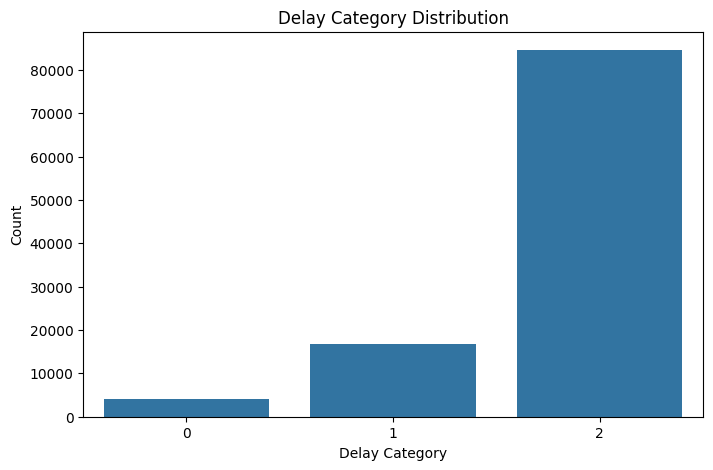

C:\Users\Asus\AppData\Local\Temp\ipykernel_19636\2571786467.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=regression_data, x="Line", y="Min Delay", estimator=np.mean, ci=None)


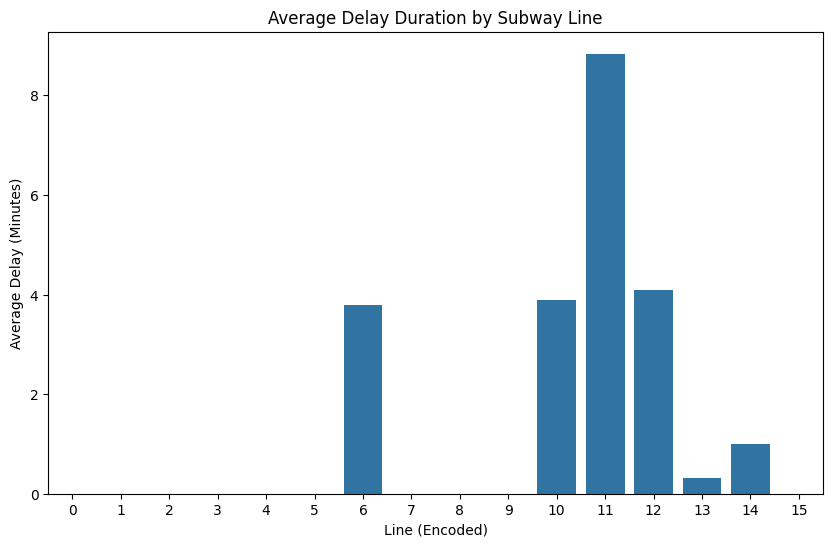

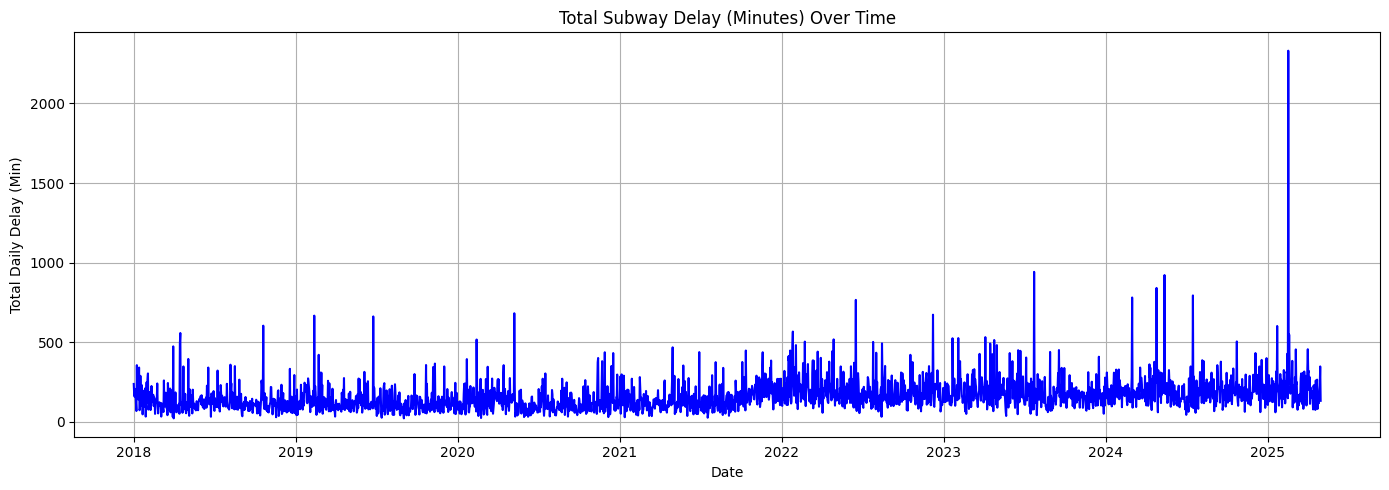

In [3]:
# Exploratory Data Analysis (EDA)
import matplotlib.dates as mdates

# Plot 1: Delay count by Delay_Category
plt.figure(figsize=(8,5))
sns.countplot(x='Delay_Category', data=classification_data)
plt.title("Delay Category Distribution")
plt.xlabel("Delay Category")
plt.ylabel("Count")
plt.show()

# Plot 2: Average delay duration by Line
plt.figure(figsize=(10,6))
sns.barplot(data=regression_data, x="Line", y="Min Delay", estimator=np.mean, ci=None)
plt.title("Average Delay Duration by Subway Line")
plt.xlabel("Line (Encoded)")
plt.ylabel("Average Delay (Minutes)")
plt.show()

# Plot 3: Daily Total Delay Over Time (for time series)
plt.figure(figsize=(14,5))
plt.plot(time_series_data['Date'], time_series_data['Min Delay'], color='blue')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title("Total Subway Delay (Minutes) Over Time")
plt.xlabel("Date")
plt.ylabel("Total Daily Delay (Min)")
plt.grid(True)
plt.tight_layout()
plt.show()


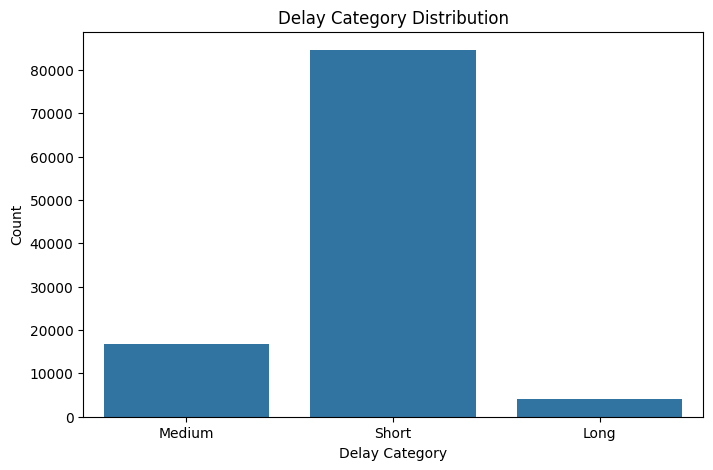

C:\Users\Asus\AppData\Local\Temp\ipykernel_19636\2927072713.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Line", y="Min Delay", estimator=np.mean, ci=None)


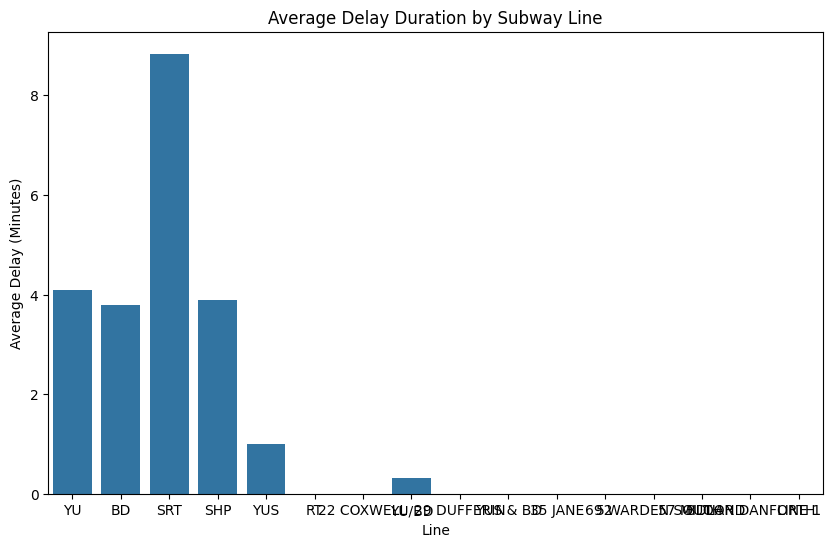

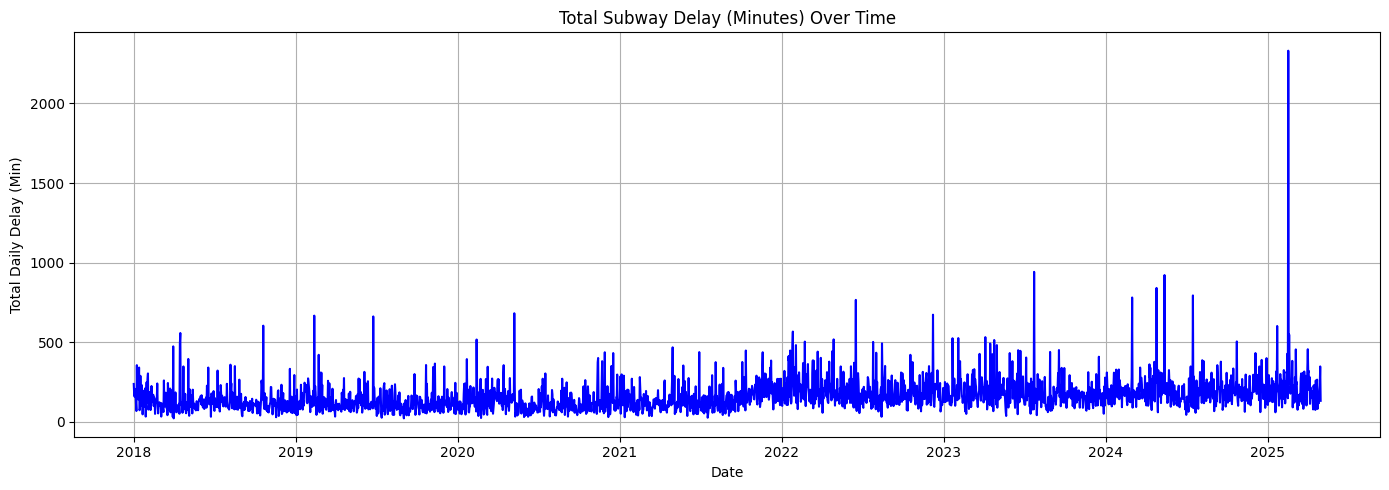

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

# 1. Delay Category Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Delay_Category', data=df)
plt.title("Delay Category Distribution")
plt.xlabel("Delay Category")
plt.ylabel("Count")
plt.show()

# 2. Average Delay Duration by Line
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Line", y="Min Delay", estimator=np.mean, ci=None)
plt.title("Average Delay Duration by Subway Line")
plt.xlabel("Line")
plt.ylabel("Average Delay (Minutes)")
plt.show()

# 3. Total Delay Over Time
df['Date'] = pd.to_datetime(df['Date'])
time_series_df = df.groupby('Date')['Min Delay'].sum().reset_index()

plt.figure(figsize=(14,5))
plt.plot(time_series_df['Date'], time_series_df['Min Delay'], color='blue')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title("Total Subway Delay (Minutes) Over Time")
plt.xlabel("Date")
plt.ylabel("Total Daily Delay (Min)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# List of categorical columns
categorical_cols = ['Day', 'Station', 'Code', 'Bound', 'Line', 'Time_Category']

# Encode each column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset (if not already)
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=["Time", "Date"])  # Drop time/date strings

# Encode all categorical columns
categorical_cols = df.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop(columns=["Delay_Category", "Min Delay", "Min Gap"])
y = df["Delay_Category"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.03      0.06       833
           1       0.40      0.10      0.16      3335
           2       0.82      0.98      0.89     16903

    accuracy                           0.80     21071
   macro avg       0.52      0.37      0.37     21071
weighted avg       0.73      0.80      0.74     21071

✅ Confusion Matrix:
 [[   26   114   693]
 [   21   337  2977]
 [   30   390 16483]]


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model with class_weight
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.01      0.03       833
           1       0.43      0.07      0.12      3335
           2       0.81      0.98      0.89     16903

    accuracy                           0.80     21071
   macro avg       0.50      0.36      0.35     21071
weighted avg       0.73      0.80      0.73     21071

✅ Confusion Matrix:
 [[   12    70   751]
 [   10   228  3097]
 [   22   237 16644]]


In [12]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Train on balanced data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_resampled, y_resampled)

# Evaluate on test set (unchanged)
y_pred = clf.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.09      0.11       833
           1       0.31      0.24      0.27      3335
           2       0.84      0.89      0.86     16903

    accuracy                           0.75     21071
   macro avg       0.43      0.41      0.42     21071
weighted avg       0.73      0.75      0.74     21071

✅ Confusion Matrix:
 [[   78   216   539]
 [  155   803  2377]
 [  324  1561 15018]]


In [14]:
!pip install xgboost




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and train XGBoost model
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_clf.fit(X_resampled, y_resampled)

# Predict on original test set
y_pred = xgb_clf.predict(X_test)

# Evaluation
print("✅ XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.28      0.22       833
           1       0.30      0.25      0.27      3335
           2       0.85      0.86      0.85     16903

    accuracy                           0.74     21071
   macro avg       0.45      0.46      0.45     21071
weighted avg       0.74      0.74      0.74     21071

✅ Confusion Matrix:
 [[  237   178   418]
 [  356   822  2157]
 [  681  1730 14492]]


In [16]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 1.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 10.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgbm_clf.fit(X_resampled, y_resampled)

# Predict on test set
y_pred = lgbm_clf.predict(X_test)

# Evaluation
print("✅ LightGBM Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 202929, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
✅ LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.30      0.24       833
           1       0.31      0.24      0.

In [20]:
from lightgbm import early_stopping, log_evaluation

lgbm_clf.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=20)  # logs every 20 iterations
    ]
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 162343, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training until validation scores don't improve for 50 rounds
[20]	valid_0's multi_logloss: 0.888412
[40]	valid_0's multi_logloss: 0.79669
[60]	valid_0's multi_logloss: 0.743137
[80]	valid_0's multi_logloss: 0.710945
[100]	valid_0's multi_logloss: 0.687716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=6,
               n_estimators=300, random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = lgbm_clf.predict(X_test)

print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.29      0.25       833
           1       0.33      0.25      0.28      3335
           2       0.85      0.88      0.87     16903

    accuracy                           0.76     21071
   macro avg       0.47      0.47      0.47     21071
weighted avg       0.74      0.76      0.75     21071

✅ Confusion Matrix:
 [[  238   191   404]
 [  323   828  2184]
 [  541  1470 14892]]


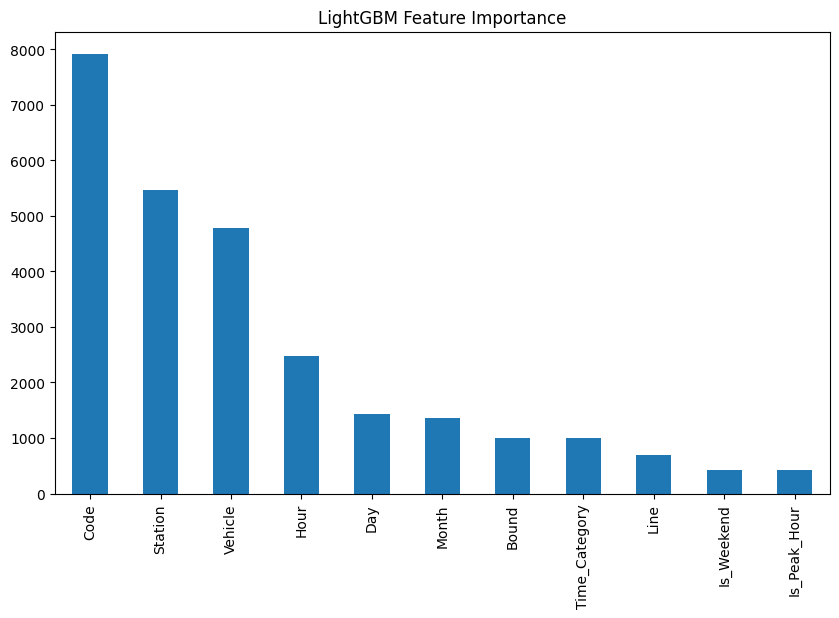

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(lgbm_clf.feature_importances_, index=X_resampled.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title('LightGBM Feature Importance')
plt.show()


In [24]:
from imblearn.combine import SMOTETomek

# Assuming your original train data is X_train, y_train (before any resampling)
smote_tomek = SMOTETomek(random_state=42)

X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

print("Before resampling:", sorted(pd.Series(y_train).value_counts().items()))
print("After resampling:", sorted(pd.Series(y_resampled).value_counts().items()))


Before resampling: [(0, 3314), (1, 13326), (2, 67643)]
After resampling: [(0, 67208), (1, 66139), (2, 65906)]


In [25]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.model_selection import train_test_split

# Split resampled data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

lgbm_clf = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    class_weight='balanced',
    random_state=42
)

lgbm_clf.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=20)]
)

# Predict on your original test set
y_pred = lgbm_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 159402, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training until validation scores don't improve for 50 rounds
[20]	valid_0's multi_logloss: 0.883507
[40]	valid_0's multi_logloss: 0.791227
[60]	valid_0's multi_logloss: 0.739423
[80]	valid_0's multi_logloss: 0.707432
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's multi_logloss: 0.684607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [26]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the model
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)

# Hyperparameter grid to search
param_grid = {
    'max_depth': [6, 10, 12],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 300, 500],
    'min_child_samples': [20, 40, 60]
}

# Define scoring metric - macro F1 to balance classes
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring=f1_macro_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on your resampled training data
grid_search.fit(X_resampled, y_resampled)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best macro F1 score:", grid_search.best_score_)

# Evaluate best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 199253, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best parameters found: {'learning_rate': 0.1, 'max_depth': 12, 'min_child_samples': 20, 'n_estimators': 500, 'num_leaves': 70}
Best macro F1 score: 0.8319881519772734
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.20      0.23       833
           1       0.36      0.25      0.30      3335
           2       0.85      0.91      0.88     16903

    accuracy                           0.78     21071
   macro avg       0.

In [27]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train with best params but without class_weight
best_lgbm = LGBMClassifier(
    learning_rate=0.1,
    max_depth=12,
    min_child_samples=20,
    n_estimators=500,
    num_leaves=70,
    random_state=42
)

best_lgbm.fit(X_resampled, y_resampled)

# Predict on original test set
y_pred_lgbm = best_lgbm.predict(X_test)

# Evaluate
print("✅ LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 199253, number of used features: 11
[LightGBM] [Info] Start training from score -1.086783
[LightGBM] [Info] Start training from score -1.102817
[LightGBM] [Info] Start training from score -1.106346
✅ LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.21      0.24       833
           1       0.36      0.26      0.30      3335
           2       0.85      0.91      0.88     16903

    accuracy                           0.78     21071
   macro avg       0.49      0.46      0.47     21071
weighted avg       0.75      0.78      0.76     21071

✅ Confusion Matrix:
 [[  176   249   408]
 [  197   853  2285]
 [  29

In [28]:
!pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/102.5 MB 1.7 MB/s eta 0:01:02
   ---------------------------------------- 0.7/102.5 MB 6.5 MB/s eta 0:00:16
   ---------------------------------------- 1.3/102.5 MB 8.0 MB/s eta 0:00:13
   - -------------------------------------- 3.2/102.5 MB 15.7 MB/s eta 0:00:07
   -- ------------------------------------- 5.3/102.5 MB 21.0 MB/s eta 0:00:05
   -- ------------------------------------- 6.9/102.5 MB 23.2 MB/s eta 0:00:05
   --- ------------------------------------ 8.6/102.5 MB 24.9 MB/s eta 0:00:04
   ---- ----------------------------------- 10.5/102.5 MB 34.4 MB/s eta 0:00:03
   ---- ----------------------------------- 12.6/102.5 MB 40.9 MB/s eta 0:00:03
   ---- ----------------------------------- 12.6/102.5 MB 40.9 MB/s eta 0:00:03
   ----- ---------------------------------- 14.7/102.5 MB 34.4 MB/s 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize CatBoost with correct eval_metric
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=10,
    eval_metric='MultiClass',           # ✅ Correct scalar metric
    custom_metric=['F1'],               # Optional: still monitor F1 per class
    random_seed=42,
    verbose=100
)

# Fit the model
cat_model.fit(X_resampled, y_resampled)

# Predict on test set
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("✅ CatBoost Classification Report:\n", classification_report(y_test, y_pred_cat))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))


0:	learn: 1.0608705	total: 335ms	remaining: 2m 47s
100:	learn: 0.6398977	total: 18.5s	remaining: 1m 13s
200:	learn: 0.5660573	total: 34.5s	remaining: 51.3s
300:	learn: 0.5152496	total: 52.3s	remaining: 34.6s
400:	learn: 0.4724697	total: 1m 10s	remaining: 17.3s
499:	learn: 0.4391276	total: 1m 28s	remaining: 0us
✅ CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.22      0.21       833
           1       0.33      0.27      0.29      3335
           2       0.85      0.88      0.86     16903

    accuracy                           0.76     21071
   macro avg       0.46      0.45      0.45     21071
weighted avg       0.74      0.76      0.75     21071

✅ Confusion Matrix:
 [[  182   241   410]
 [  274   886  2175]
 [  467  1591 14845]]


0:	learn: 1.0608705	total: 191ms	remaining: 1m 35s
100:	learn: 0.6398977	total: 17.9s	remaining: 1m 10s
200:	learn: 0.5660573	total: 35.7s	remaining: 53.1s
300:	learn: 0.5152496	total: 54.7s	remaining: 36.2s
400:	learn: 0.4724697	total: 1m 10s	remaining: 17.3s
499:	learn: 0.4391276	total: 1m 34s	remaining: 0us
✅ CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.22      0.21       833
           1       0.33      0.27      0.29      3335
           2       0.85      0.88      0.86     16903

    accuracy                           0.76     21071
   macro avg       0.46      0.45      0.45     21071
weighted avg       0.74      0.76      0.75     21071

✅ Confusion Matrix:
 [[  182   241   410]
 [  274   886  2175]
 [  467  1591 14845]]


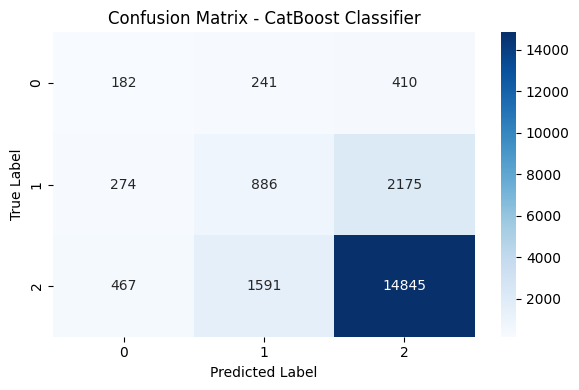

In [31]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize CatBoost
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=10,
    eval_metric='MultiClass',
    custom_metric=['F1'],
    random_seed=42,
    verbose=100
)

# Train the model
cat_model.fit(X_resampled, y_resampled)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("✅ CatBoost Classification Report:\n", classification_report(y_test, y_pred_cat))
cm = confusion_matrix(y_test, y_pred_cat)
print("✅ Confusion Matrix:\n", cm)

# 🎨 Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.tight_layout()
plt.show()


In [32]:
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing Delay_Category (our target)
df = df.dropna(subset=['Delay_Category'])

# Encode target variable
target_encoder = LabelEncoder()
df['Delay_Category_Encoded'] = target_encoder.fit_transform(df['Delay_Category'])

# Select features for modeling
features = ['Day', 'Station', 'Code', 'Bound', 'Line', 'Hour', 'Time_Category', 'Is_Weekend']
X = df[features]
y = df['Delay_Category_Encoded']

# Encode categorical features
X_encoded = pd.get_dummies(X, columns=['Day', 'Station', 'Code', 'Bound', 'Line', 'Time_Category'], drop_first=True)

# Ensure Is_Weekend is numeric
X_encoded['Is_Weekend'] = X_encoded['Is_Weekend'].astype(int)

X_encoded.head()


,Hour,Is_Weekend,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Station_1,Station_2,...,Line_8,Line_9,Line_10,Line_11,Line_12,Line_13,Line_14,Line_15,Time_Category_1,Time_Category_2
0,0,0,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,1,0,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1,0,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2,0,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [33]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTETomek to balance the training set
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Show new class distribution
resampled_distribution = pd.Series(y_resampled).value_counts().sort_index()
resampled_distribution.index = target_encoder.inverse_transform(resampled_distribution.index)
resampled_distribution


0    67611
1    67429
2    67409
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select features and target
feature_cols = ['Day', 'Time_Category', 'Station', 'Code', 'Min Delay', 'Min Gap', 'Vehicle']
X = df[feature_cols].copy()
y = df['Delay_Category']

# 2. Clean and encode categorical features
for col in ['Day', 'Time_Category', 'Station', 'Code', 'Vehicle']:
    X[col] = X[col].astype(str).str.replace(r'[^\w\s]', '', regex=True)
    X[col] = X[col].str.replace(r'\s+', '_', regex=True)

# Encode categorical features
le_dict = {}
for col in ['Day', 'Time_Category', 'Station', 'Code', 'Vehicle']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Handle class imbalance using SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# 5. Train LightGBM model
lgbm_model = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=12, random_state=42)
lgbm_model.fit(X_resampled, y_resampled)

# 6. Predict and evaluate
y_pred = lgbm_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1231
[LightGBM] [Info] Number of data points in the train set: 202135, number of used features: 7
[LightGBM] [Info] Start training from score -1.094781
[LightGBM] [Info] Start training from score -1.100534
[LightGBM] [Info] Start training from score -1.100534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 830.0},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3332.0},
  '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16909.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 21071.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 21071.0}},
 array([[  830,     0,     0],
        [    0,  3332,     0],
        [    0,     0, 16909]]))

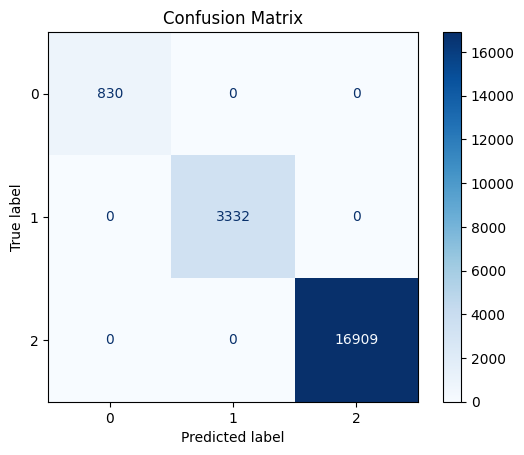

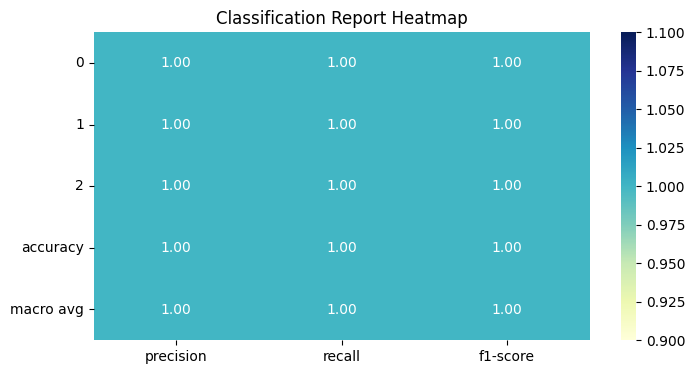

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = lgbm_model.classes_  # class labels like [0, 1, 2]

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Display classification report in table format
report = classification_report(y_test, y_pred, target_names=[str(i) for i in labels], output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


In [45]:
from sklearn.preprocessing import OneHotEncoder
import joblib
import os

# ✅ Redefine categorical columns to match current data
categorical_cols = ['Day', 'Time_Category', 'Station', 'Code', 'Vehicle']

# ✅ Define encoder and fit
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

# ✅ Save encoder
os.makedirs("model", exist_ok=True)
joblib.dump(encoder, 'model/encoder.pkl')


['model/encoder.pkl']